# K-means Clustering

![clustering image](https://31.media.tumblr.com/b82e1520a5bb6390030cbdc1eda43b02/tumblr_inline_nhfsd93cWX1rnd3q0.png)

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. 

##### The way kmeans algorithm works is as follows:
1. Specify number of clusters K.


2. Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.


3. Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

##### Support Libraries

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

Creating Sample Data using numpy to practise and implement K-means Clustering.
**make_blobs** is a data generator that creates a cluster specific random data. 

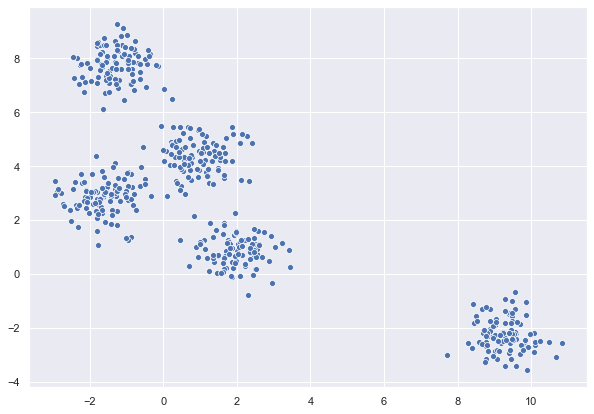

In [46]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=0)

f,ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(x = X[:, 0], y=X[:,1], ax = ax)

### The approach kmeans follows to solve the problem is called Expectation-Maximization.

*The objective function is:*

![alt text](https://miro.medium.com/max/1096/1*myXqNCTZH80uvO2QyU6F5Q.png)

## Flow Chart



![Flow chart](https://openi.nlm.nih.gov/imgs/512/338/4507578/PMC4507578_sensors-15-13132-g015.png?keywords=wheeze,crackle)

In [37]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        
        labels = pairwise_distances_argmin(X, centers)
        
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

centers, labels = find_clusters(X, 5)



In [39]:
df = pd.DataFrame(data=X, columns=["X", "Y"])

In [41]:
df['labels'] = labels

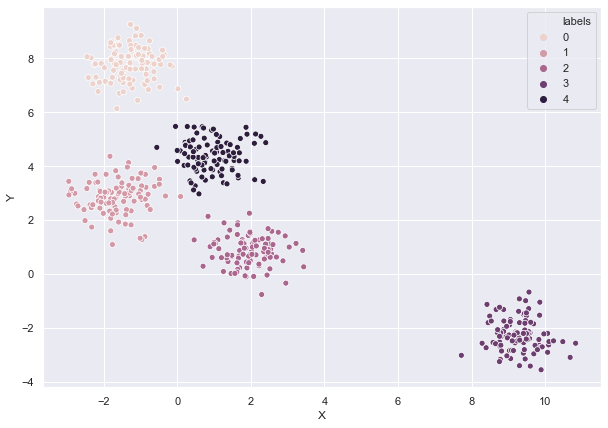

In [45]:
f,ax = plt.subplots(figsize=(10,7))
sns.scatterplot(x = 'X', y='Y', hue = 'labels', data=df, ax = ax, legend='full')

#### Few things to note here:

1. Since clustering algorithms including kmeans use distance-based measurements to determine the similarity between data points, it’s recommended to standardize the data to have a mean of zero and a standard deviation of one since almost always the features in any dataset would have different units of measurements such as age vs income.


2. Given kmeans iterative nature and the random initialization of centroids at the start of the algorithm, different initializations may lead to different clusters since kmeans algorithm may stuck in a local optimum and may not converge to global optimum. Therefore, it’s recommended to run the algorithm using different initializations of centroids and pick the results of the run that that yielded the lower sum of squared distance.

[Theoritical Refrence](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a)